In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [2]:
car_data = pd.read_csv("ElectricCarData_Clean.csv")

In [3]:
car_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# Preprocessing

In [4]:
car_data.describe(include='all')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103,103,103.000000,103.000000,103.000000,103.000000,103,103,103,103,103,103,103.000000,103.000000
unique,33,102,NaN,NaN,NaN,NaN,51,2,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,NaN,NaN,NaN,NaN,230,Yes,AWD,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,NaN,NaN,NaN,NaN,6,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,7.396117,179.194175,338.786408,189.165049,NaN,NaN,NaN,NaN,NaN,NaN,4.883495,55811.563107
std,NaN,NaN,3.017430,43.573030,126.014444,29.566839,NaN,NaN,NaN,NaN,NaN,NaN,0.795834,34134.665280
min,NaN,NaN,2.100000,123.000000,95.000000,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20129.000000
25%,NaN,NaN,5.100000,150.000000,250.000000,168.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,34429.500000
50%,NaN,NaN,7.300000,160.000000,340.000000,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,9.000000,200.000000,400.000000,203.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,65000.000000


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


# Dropping features that are not required to build our model

In [6]:
df = car_data.drop(labels='Model', axis=1)

# Check for any missing value in data set and treat it

In [7]:
df.isna().sum()

Brand              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [8]:
df_no_mv = df.dropna()

# Exploring the Data
1. PDFs

Text(0.5, 1.0, 'Car Price Distribution Plot')

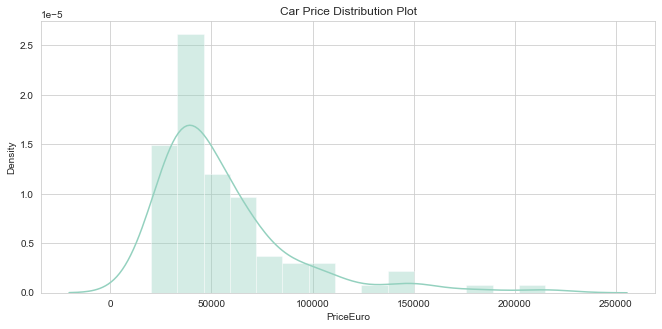

In [10]:
plt.figure(figsize=[11,5])
sns.distplot(df_no_mv['PriceEuro'])
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'TopSpeed Distribution Plot')

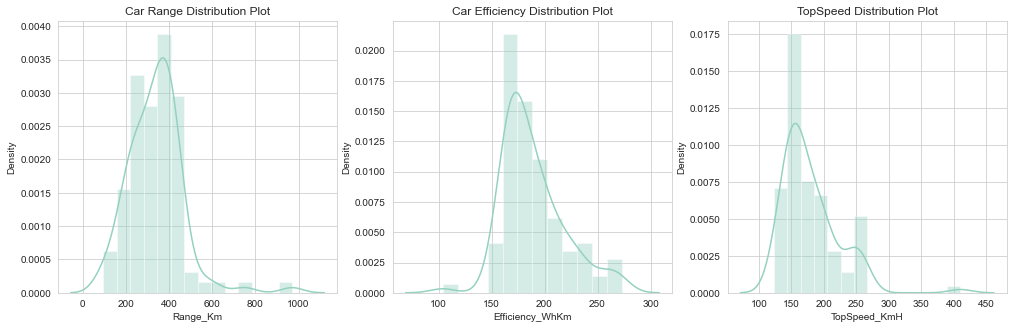

In [13]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_no_mv['Range_Km'])
plt.title('Car Range Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df_no_mv['Efficiency_WhKm'])
plt.title('Car Efficiency Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df_no_mv['TopSpeed_KmH'])
plt.title('TopSpeed Distribution Plot')

# Dealing with outliers
1. Price Column

In [14]:
q = df_no_mv['PriceEuro'].quantile(0.99)
data_1 = df_no_mv[df_no_mv['PriceEuro']<q]


Text(0.5, 1.0, 'Car Price Distribution Plot')

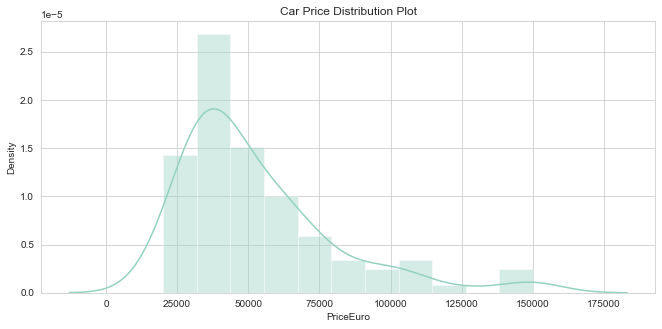

In [15]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(data_1['PriceEuro'])
plt.title('Car Price Distribution Plot')

### 2. Car Range Column

Text(0.5, 1.0, 'Car Range Distribution Plot')

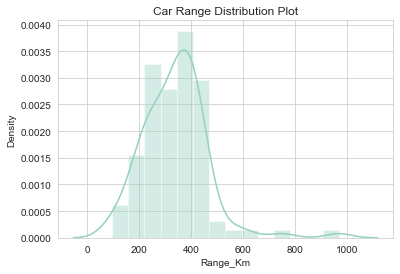

In [16]:
#Now we can treat the other numerical variables outlier in a similar way
sns.distplot(df_no_mv['Range_Km'])
plt.title('Car Range Distribution Plot')

In [17]:
q = data_1['Range_Km'].quantile(0.99)
data_2 = data_1[data_1['Range_Km']<q]

<AxesSubplot:xlabel='Range_Km', ylabel='Density'>

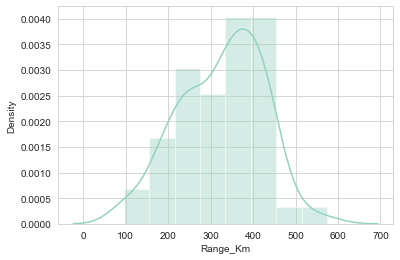

In [18]:
sns.distplot(data_2['Range_Km'])

### 3. Efficiency

Text(0.5, 1.0, 'Car Efficiency Distribution Plot')

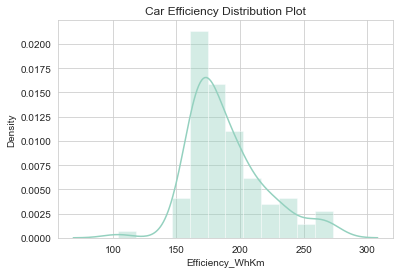

In [19]:
sns.distplot(df_no_mv['Efficiency_WhKm'])
plt.title('Car Efficiency Distribution Plot')

In [23]:
q = data_1['Efficiency_WhKm'].quantile(0.99)
data_2 = data_1[data_1['Efficiency_WhKm']<q]

<AxesSubplot:xlabel='Efficiency_WhKm', ylabel='Density'>

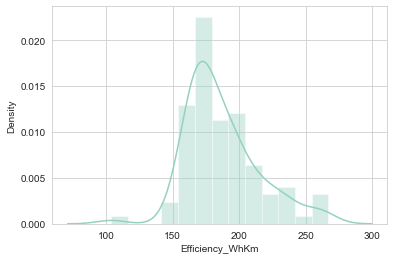

In [24]:
sns.distplot(data_2['Efficiency_WhKm'])

### 3. TopSpeed

Text(0.5, 1.0, 'Car TopSpeed Distribution Plot')

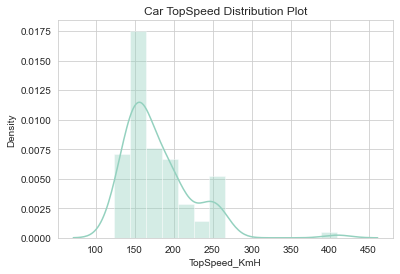

In [25]:
sns.distplot(df_no_mv['TopSpeed_KmH'])
plt.title('Car TopSpeed Distribution Plot')

In [27]:
data_2 = data_1[data_1['TopSpeed_KmH']<300]

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='Density'>

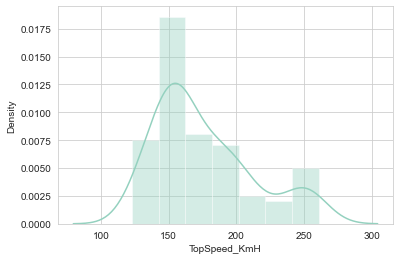

In [28]:
sns.distplot(data_2['TopSpeed_KmH'])

In [29]:
# Reset index
cleaned_data = data_2.reset_index(drop=True)

In [30]:
# once again checking discriptive statistics
cleaned_data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.494059,176.108911,332.178218,188.663366,4.900990,52998.118812
std,2.964045,36.454876,110.252927,29.616643,0.793788,27765.105291
min,2.500000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.500000,150.000000,250.000000,168.000000,5.000000,34400.000000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,200.000000,5.000000,64000.000000
max,22.400000,261.000000,750.000000,273.000000,7.000000,150000.000000


# Checking Linearity using Scatter Plot

Text(0.5, 1.0, 'Price and TopSpeed')

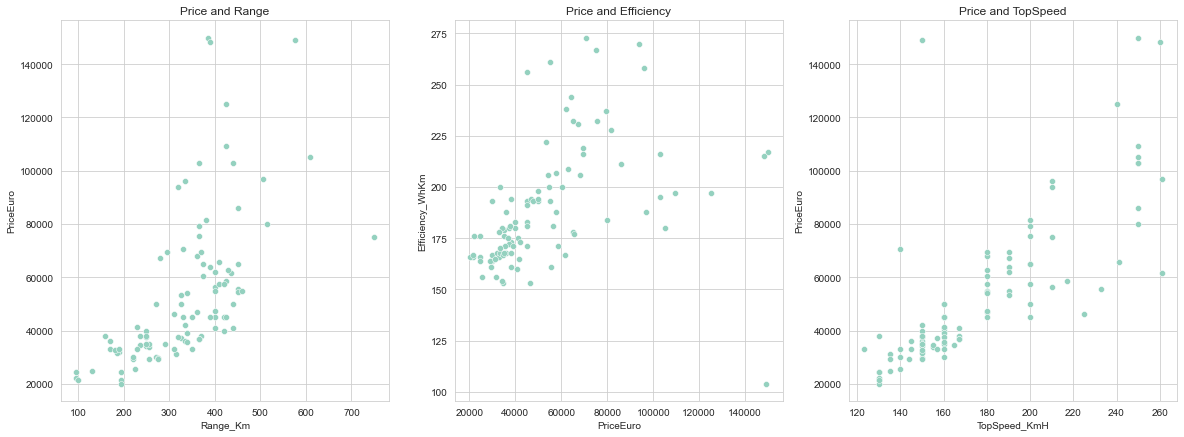

In [31]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Range")
sns.scatterplot(x='Range_Km',y='PriceEuro',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Efficiency")
sns.scatterplot(x='PriceEuro',y='Efficiency_WhKm',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='PriceEuro',x='TopSpeed_KmH',data=cleaned_data)
plt.title("Price and TopSpeed")

<AxesSubplot:xlabel='PriceEuro', ylabel='Density'>

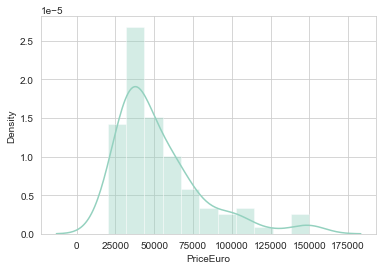

In [32]:
#recall the distribution plot of price
sns.distplot(cleaned_data['PriceEuro'])

# Log Transformation on Price Column

In [33]:
log_price = np.log(cleaned_data['PriceEuro'])

cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,log_price
0,Tesla,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,10.923778
1,Volkswagen,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,10.308953
2,Polestar,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,10.940933
3,BMW,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,11.127851
4,Honda,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,10.404172


Text(0.5, 1.0, 'Log price and EngineV')

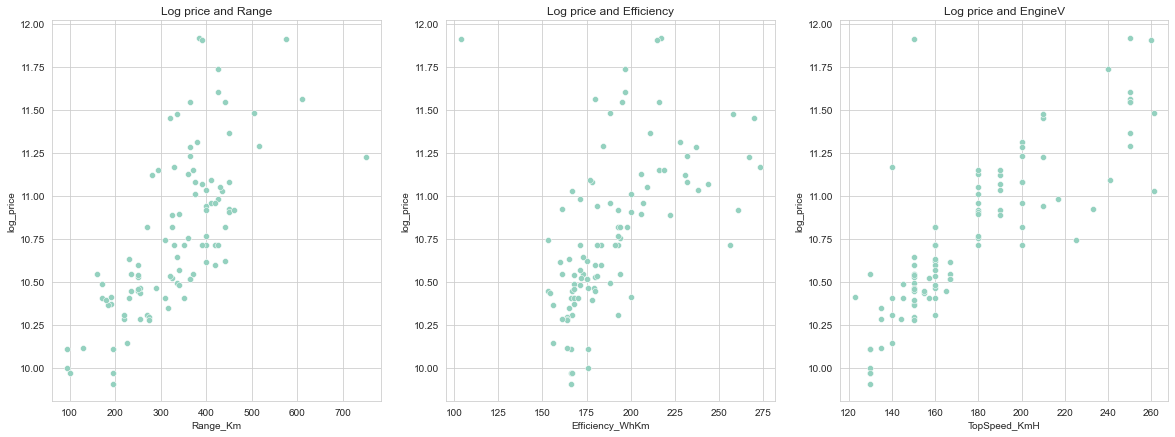

In [34]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Range")
sns.scatterplot(x='Range_Km',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Efficiency")
sns.scatterplot(y='log_price',x='Efficiency_WhKm',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='TopSpeed_KmH',data=cleaned_data)
plt.title("Log price and EngineV")


In [35]:
cleaned_data = cleaned_data.drop(['PriceEuro'],axis=1)

### Checking Multicollinearity Using VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Range_Km','Efficiency_WhKm','TopSpeed_KmH']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,18.233630,Range_Km
1,24.370323,Efficiency_WhKm
2,39.859584,TopSpeed_KmH


In [37]:
#fixing Multicollinearity
#Topspeed has high VIF so we are just dropping that column
# So even if Efficiency seems with a high VIF, too, once 'Topspeed' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('TopSpeed_KmH',axis=1)

In [38]:
data_no_multicolinearity.head()

,Brand,AccelSec,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,log_price
0,Tesla,4.6,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,10.923778
1,Volkswagen,10.0,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,10.308953
2,Polestar,4.7,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,10.940933
3,BMW,6.8,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,11.127851
4,Honda,9.5,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,10.404172


# Feature Selection

In [39]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Segment            0.787616
FastCharge_KmH     0.731145
AccelSec           0.715326
Range_Km           0.714600
PowerTrain         0.627417
BodyStyle          0.522947
Efficiency_WhKm    0.512212
RapidCharge        0.312613
Seats              0.272025
Brand              0.204861
PlugType           0.029724
dtype: float64


<AxesSubplot:>

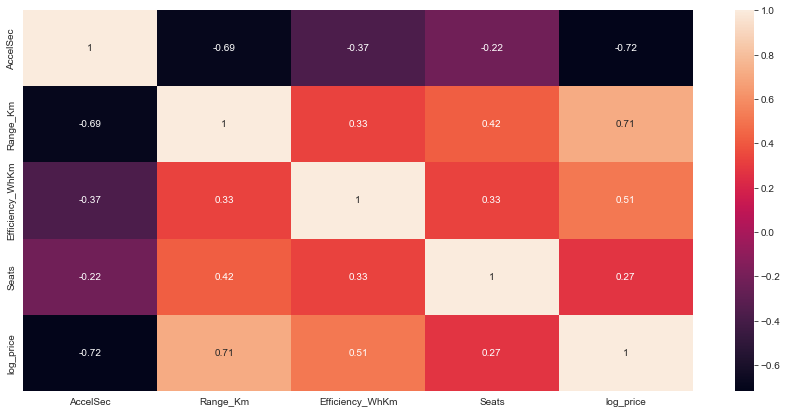

In [40]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [41]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

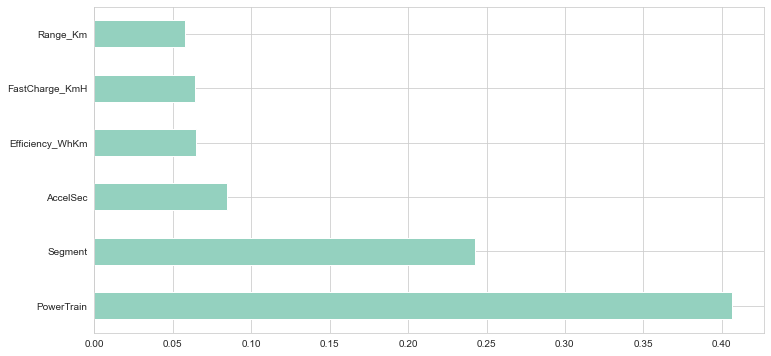

In [42]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [43]:
print(feat_importances.sort_values(ascending=False))

PowerTrain         0.406645
Segment            0.242823
AccelSec           0.084713
Efficiency_WhKm    0.064486
FastCharge_KmH     0.064109
Range_Km           0.058037
Brand              0.023869
Seats              0.023454
BodyStyle          0.020119
PlugType           0.010877
RapidCharge        0.000870
dtype: float64


# Categorial Features

In [44]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [45]:
data_with_dummies.head()

,AccelSec,Range_Km,Efficiency_WhKm,Seats,log_price,Brand_Audi,Brand_BMW,Brand_Byton,Brand_CUPRA,Brand_Citroen,...,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N
0,4.6,450,161,5,10.923778,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,10.0,270,167,5,10.308953,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,400,181,5,10.940933,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6.8,360,206,5,11.127851,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,9.5,170,168,4,10.404172,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Model Development

### Declaring dependent and independent variable

In [48]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Efficiency_WhKm','Range_Km']])

StandardScaler()

In [51]:
inputs_scaled = scaler.transform(x[['Efficiency_WhKm','Range_Km']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Efficiency_WhKm','Range_Km'])

In [52]:
input_scaled2 =scaled_data.join(x.drop(['Efficiency_WhKm','Range_Km'],axis=1))

# Training and Testing Data

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [54]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : -100.62301839940558
RMSE : 3.724789515831694


# Random Forest Regressor Model

In [55]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8034507342973486
RMSE : 0.16381037479618454


# GBT Regressor Model

In [56]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8528147214131516
RMSE : 0.1417548341658594


In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.11462092324131279
MSE: 0.020094433009390303
RMSE: 0.1417548341658594


### Checking Predictions 

In [58]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
16,35553.48,33133.00,-2420.48,7.31
17,52901.28,41526.00,-11375.28,27.39
18,76362.44,64000.00,-12362.44,19.32
19,52556.63,62000.00,9443.37,15.23
20,64070.91,65000.00,929.09,1.43
